<a href="https://colab.research.google.com/github/DeborahAywa/Credit-Risk-Assessment/blob/main/Credit_Risk_Assessment_Using_Logistic_Regression_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Credit Risk Model to enable Apex Trust Bank to categorize their customers into bad or good lenders.
# We will leverage historical customer data to assess the credit risk likeliness of the borrowers at Apex Trust Bank.

In [ ]:
#Install important packages
# for creating linear and logistic regresssion models
install.packages("tidymodels")
#for creating data splits and resamples
install.packages("rsample")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [ ]:
# for arranging visualization
install.packages("gridExtra")
# for data manipulation and visualization
install.packages("tidyverse")
#for dealing with missing data
install.packages("Amelia")
#for data visualization and descriptive statistics
install.packages("psych")
#for visualizing variable importance in model development
install.packages("vip")
#for font customization
install.packages("extrafont")
#for additional model analysis
install.packages("caret")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [ ]:
#Load libraries
library(tidyverse)
library(tidymodels)
library(gridExtra)
library(Amelia)
library(psych)
library(vip)
library(extrafont)
library(caret)
library(rsample)

#Import the Data from Apex Trust Bank

In [ ]:
#import data
#Set working directory
#setwd("E:/Desktop/Data Science")
getwd()

[1] "/content"

In [ ]:
df <- read_csv("/content/Apex_Trust_Dataset.csv")

Rows: 2542 Columns: 20
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
dbl (20): status, duration, credit_history, purpose, amount, savings, employ...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [ ]:
#Data structure of the columns in the dataset
str(df)

spc_tbl_ [2,542 × 20] (S3: spec_tbl_df/tbl_df/tbl/data.frame)
 $ status                 : num [1:2542] 4 4 2 2 1 4 3 1 1 2 ...
 $ duration               : num [1:2542] 76 65 87 67 96 99 25 58 32 72 ...
 $ credit_history         : num [1:2542] 3 2 1 2 4 1 2 1 4 3 ...
 $ purpose                : num [1:2542] 9 6 0 1 3 3 3 8 1 1 ...
 $ amount                 : num [1:2542] 325 4825 3300 9575 5525 ...
 $ savings                : num [1:2542] 4 2 1 2 1 4 2 2 1 3 ...
 $ employment_duration    : num [1:2542] 3 4 4 3 1 2 4 2 2 2 ...
 $ installment_rate       : num [1:2542] 2 3 2 3 3 3 2 4 1 3 ...
 $ other_debtors          : num [1:2542] 3 2 1 3 3 1 1 1 3 2 ...
 $ present_residence      : num [1:2542] 2 4 4 1 4 2 2 4 3 2 ...
 $ property               : num [1:2542] 4 3 1 4 3 3 1 2 4 3 ...
 $ age                    : num [1:2542] 53 82 52 44 23 76 52 30 34 80 ...
 $ other_installment_plans: num [1:2542] 3 2 2 1 2 1 3 2 1 3 ...
 $ housing                : num [1:2542] 3 3 2 2 3 3 3 3 2 3 ...
 $ n

In [ ]:
#Column names
colnames(df)

[1] "status"                  "duration"               
 [3] "credit_history"          "purpose"                
 [5] "amount"                  "savings"                
 [7] "employment_duration"     "installment_rate"       
 [9] "other_debtors"           "present_residence"      
[11] "property"                "age"                    
[13] "other_installment_plans" "housing"                
[15] "number_credits"          "job"                    
[17] "people_liable"           "telephone"              
[19] "foreign_worker"          "credit_risk"

In [ ]:
#view the table
glimpse(df)

Rows: 2,542
Columns: 20
$ status                  <dbl> 4, 4, 2, 2, 1, 4, 3, 1, 1, 2, 4, 4, 3, 2, 2, 2…
$ duration                <dbl> 76, 65, 87, 67, 96, 99, 25, 58, 32, 72, 98, 42…
$ credit_history          <dbl> 3, 2, 1, 2, 4, 1, 2, 1, 4, 3, 3, 2, 0, 4, 1, 2…
$ purpose                 <dbl> 9, 6, 0, 1, 3, 3, 3, 8, 1, 1, 3, 9, 2, 7, 1, 1…
$ amount                  <dbl> 325, 4825, 3300, 9575, 5525, 4750, 9475, 3850,…
$ savings                 <dbl> 4, 2, 1, 2, 1, 4, 2, 2, 1, 3, 4, 2, 5, 3, 5, 2…
$ employment_duration     <dbl> 3, 4, 4, 3, 1, 2, 4, 2, 2, 2, 3, 3, 1, 4, 3, 1…
$ installment_rate        <dbl> 2, 3, 2, 3, 3, 3, 2, 4, 1, 3, 4, 2, 4, 1, 1, 3…
$ other_debtors           <dbl> 3, 2, 1, 3, 3, 1, 1, 1, 3, 2, 3, 3, 3, 2, 2, 1…
$ present_residence       <dbl> 2, 4, 4, 1, 4, 2, 2, 4, 3, 2, 3, 1, 2, 3, 1, 1…
$ property                <dbl> 4, 3, 1, 4, 3, 3, 1, 2, 4, 3, 2, 3, 2, 2, 3, 3…
$ age                     <dbl> 53, 82, 52, 44, 23, 76, 52, 30, 34, 80, 31, 58…
$ other_installm

#Exploratory Data Analysis

In [ ]:
#Duplicating the dataset
df_dup = df
head(df_dup, 10)

status,duration,credit_history,purpose,amount,savings,employment_duration,installment_rate,other_debtors,present_residence,property,age,other_installment_plans,housing,number_credits,job,people_liable,telephone,foreign_worker,credit_risk
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
4,76,3,9,325,4,3,2,3,2,4,53,3,3,1,2,1,1,1,0
4,65,2,6,4825,2,4,3,2,4,3,82,2,3,4,1,1,2,0,0
2,87,1,0,3300,1,4,2,1,4,1,52,2,2,4,4,1,1,0,0
2,67,2,1,9575,2,3,3,3,1,4,44,1,2,2,2,2,2,1,0
1,96,4,3,5525,1,1,3,3,4,3,23,2,3,4,2,1,1,0,0
4,99,1,3,4750,4,2,3,1,2,3,76,1,3,3,4,2,1,1,0
3,25,2,3,9475,2,4,2,1,2,1,52,3,3,1,3,1,2,1,0
1,58,1,8,3850,2,2,4,1,4,2,30,2,3,3,2,1,1,1,0
1,32,4,1,9250,1,2,1,3,3,4,34,1,2,1,1,1,1,1,0


## From the data description we will convert the categorical datasets to factor type.

In [ ]:
# Assigning all categorical columns to an object
cat_cols <- c("status", "credit_history","purpose", "savings", "employment_duration", "installment_rate", "other_debtors", "present_residence", "property", "other_installment_plans","housing", "number_credits", "job", "people_liable", "telephone", "foreign_worker", "credit_risk")
cat_cols

[1] "status"                  "credit_history"         
 [3] "purpose"                 "savings"                
 [5] "employment_duration"     "installment_rate"       
 [7] "other_debtors"           "present_residence"      
 [9] "property"                "other_installment_plans"
[11] "housing"                 "number_credits"         
[13] "job"                     "people_liable"          
[15] "telephone"               "foreign_worker"         
[17] "credit_risk"

In [ ]:
#Convert categorical columns to a factor variable
#lapply function that applies a specifiesd function to each element of the list
# FACTOR converts columns into categorical variables
df_dup[,cat_cols] <- lapply(df_dup[, cat_cols], factor)
head(df_dup, 10)

status,duration,credit_history,purpose,amount,savings,employment_duration,installment_rate,other_debtors,present_residence,property,age,other_installment_plans,housing,number_credits,job,people_liable,telephone,foreign_worker,credit_risk
<fct>,<dbl>,<fct>,<fct>,<dbl>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<dbl>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>
4,76,3,9,325,4,3,2,3,2,4,53,3,3,1,2,1,1,1,0
4,65,2,6,4825,2,4,3,2,4,3,82,2,3,4,1,1,2,0,0
2,87,1,0,3300,1,4,2,1,4,1,52,2,2,4,4,1,1,0,0
2,67,2,1,9575,2,3,3,3,1,4,44,1,2,2,2,2,2,1,0
1,96,4,3,5525,1,1,3,3,4,3,23,2,3,4,2,1,1,0,0
4,99,1,3,4750,4,2,3,1,2,3,76,1,3,3,4,2,1,1,0
3,25,2,3,9475,2,4,2,1,2,1,52,3,3,1,3,1,2,1,0
1,58,1,8,3850,2,2,4,1,4,2,30,2,3,3,2,1,1,1,0
1,32,4,1,9250,1,2,1,3,3,4,34,1,2,1,1,1,1,1,0


In [ ]:
#Renaming variable values
#credit_risk column to make more sense
df_dup = df_dup |> mutate(credit_risk = ifelse(credit_risk == 0, 'bad', 'good'))
head(df_dup, 10)

status,duration,credit_history,purpose,amount,savings,employment_duration,installment_rate,other_debtors,present_residence,property,age,other_installment_plans,housing,number_credits,job,people_liable,telephone,foreign_worker,credit_risk
<fct>,<dbl>,<fct>,<fct>,<dbl>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<dbl>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<chr>
4,76,3,9,325,4,3,2,3,2,4,53,3,3,1,2,1,1,1,bad
4,65,2,6,4825,2,4,3,2,4,3,82,2,3,4,1,1,2,0,bad
2,87,1,0,3300,1,4,2,1,4,1,52,2,2,4,4,1,1,0,bad
2,67,2,1,9575,2,3,3,3,1,4,44,1,2,2,2,2,2,1,bad
1,96,4,3,5525,1,1,3,3,4,3,23,2,3,4,2,1,1,0,bad
4,99,1,3,4750,4,2,3,1,2,3,76,1,3,3,4,2,1,1,bad
3,25,2,3,9475,2,4,2,1,2,1,52,3,3,1,3,1,2,1,bad
1,58,1,8,3850,2,2,4,1,4,2,30,2,3,3,2,1,1,1,bad
1,32,4,1,9250,1,2,1,3,3,4,34,1,2,1,1,1,1,1,bad


In [ ]:
#Transforming the status column
df_dup$status = ifelse(df_dup$status == '1', 'no checking account',
                         ifelse(df_dup$status == '2', '< 0 USD',
                         ifelse(df_dup$status == '3', '0 USD >= & < 200 USD', '>= 200 USD')))

df_dup$status = factor(df_dup$status, levels = c('no checking account', '< 0 USD', '0 USD >= & < 200 USD', '>= 200 USD'))

In [ ]:
head(df_dup, 10)

status,duration,credit_history,purpose,amount,savings,employment_duration,installment_rate,other_debtors,present_residence,property,age,other_installment_plans,housing,number_credits,job,people_liable,telephone,foreign_worker,credit_risk
<fct>,<dbl>,<fct>,<fct>,<dbl>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<dbl>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<chr>
>= 200 USD,76,3,9,325,4,3,2,3,2,4,53,3,3,1,2,1,1,1,bad
>= 200 USD,65,2,6,4825,2,4,3,2,4,3,82,2,3,4,1,1,2,0,bad
< 0 USD,87,1,0,3300,1,4,2,1,4,1,52,2,2,4,4,1,1,0,bad
< 0 USD,67,2,1,9575,2,3,3,3,1,4,44,1,2,2,2,2,2,1,bad
no checking account,96,4,3,5525,1,1,3,3,4,3,23,2,3,4,2,1,1,0,bad
>= 200 USD,99,1,3,4750,4,2,3,1,2,3,76,1,3,3,4,2,1,1,bad
0 USD >= & < 200 USD,25,2,3,9475,2,4,2,1,2,1,52,3,3,1,3,1,2,1,bad
no checking account,58,1,8,3850,2,2,4,1,4,2,30,2,3,3,2,1,1,1,bad
no checking account,32,4,1,9250,1,2,1,3,3,4,34,1,2,1,1,1,1,1,bad


In [ ]:
df_dup$credit_risk = as.factor(df_dup$credit_risk)

In [ ]:
#Summary of dataset
summary(df_dup)

                  status       duration      credit_history    purpose   
 no checking account :636   Min.   :  2.00   0:378          3      :421  
 < 0 USD             :667   1st Qu.: 16.00   1:405          0      :346  
 0 USD >= & < 200 USD:509   Median : 33.00   2:824          2      :301  
 >= 200 USD          :730   Mean   : 41.13   3:375          1      :275  
                            3rd Qu.: 65.75   4:560          9      :257  
                            Max.   :100.00                  10     :184  
                                                            (Other):758  
     amount      savings employment_duration installment_rate other_debtors
 Min.   :  125   1:877   1:353               1:555            1:1415       
 1st Qu.: 1382   2:410   2:483               2:599            2: 583       
 Median : 2550   3:364   3:656               3:536            3: 544       
 Mean   : 3540   4:370   4:492               4:852                         
 3rd Qu.: 5075   5:521   5:5

#Visualizing our dataset

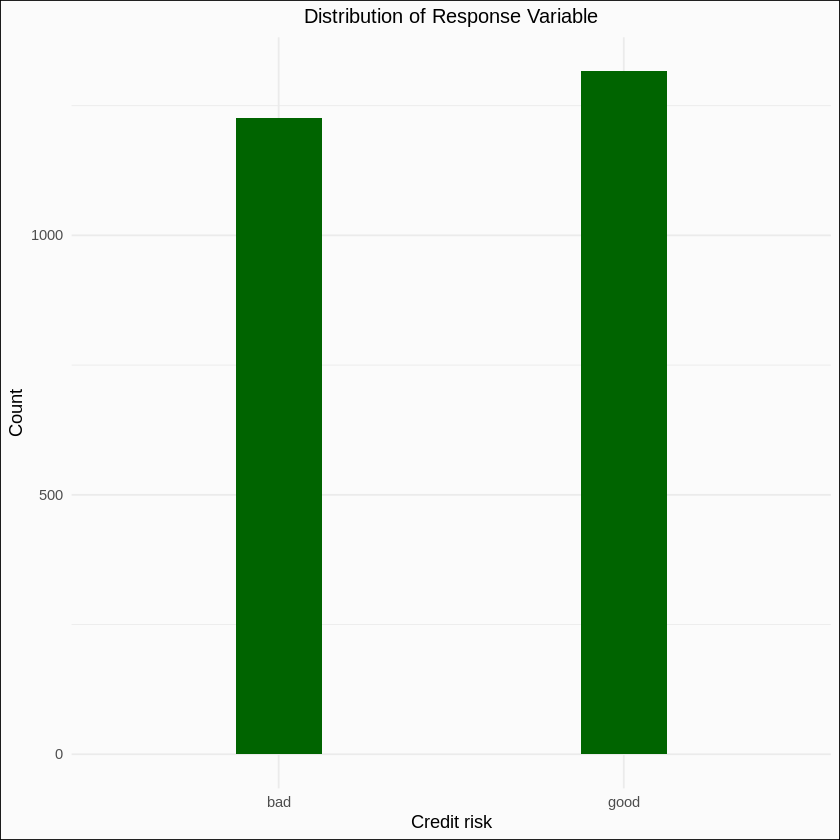

In [ ]:
#Visualization of our credit risk column
credit_risk_dist <- ggplot(df_dup,
                          aes(x = credit_risk)) +
                            geom_bar(width = 0.25, fill = 'dark green') +
                            theme_minimal() +
                            labs(x = 'Credit risk',
                                 y = 'Count',
                                 title = "Distribution of Response Variable") +
                            theme(plot.title = element_text(size = 12, family = 'Arial', hjust = 0.5),
                                  plot.subtitle = element_text(size = 12, family = 'Arial', hjust = 0.5),
                                  plot.background = element_rect(fill = "#FBFBFB"))

#Credit_risk distribution
credit_risk_dist

## From our dataset , we can see that we have a few more good customers than bad customers

In [ ]:
#Visualizing distributions of individual variables by credit risk using histograms
df2 = df |> mutate(credit_risk = as.factor(ifelse(credit_risk == 0, 'bad', 'good')))
head(df2, 10)

status,duration,credit_history,purpose,amount,savings,employment_duration,installment_rate,other_debtors,present_residence,property,age,other_installment_plans,housing,number_credits,job,people_liable,telephone,foreign_worker,credit_risk
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
4,76,3,9,325,4,3,2,3,2,4,53,3,3,1,2,1,1,1,bad
4,65,2,6,4825,2,4,3,2,4,3,82,2,3,4,1,1,2,0,bad
2,87,1,0,3300,1,4,2,1,4,1,52,2,2,4,4,1,1,0,bad
2,67,2,1,9575,2,3,3,3,1,4,44,1,2,2,2,2,2,1,bad
1,96,4,3,5525,1,1,3,3,4,3,23,2,3,4,2,1,1,0,bad
4,99,1,3,4750,4,2,3,1,2,3,76,1,3,3,4,2,1,1,bad
3,25,2,3,9475,2,4,2,1,2,1,52,3,3,1,3,1,2,1,bad
1,58,1,8,3850,2,2,4,1,4,2,30,2,3,3,2,1,1,1,bad
1,32,4,1,9250,1,2,1,3,3,4,34,1,2,1,1,1,1,1,bad


In [ ]:
#Visualize status
status <- ggplot(data = df2, aes(x = status)) +
                 geom_histogram(binwidth = 1,
                                 col = "black",
                                 aes(fill = after_stat(count))) +
                 facet_wrap(~credit_risk) +
                 scale_fill_gradient("Count", low = "lightgreen", high = "darkgreen") +
                 theme_minimal()

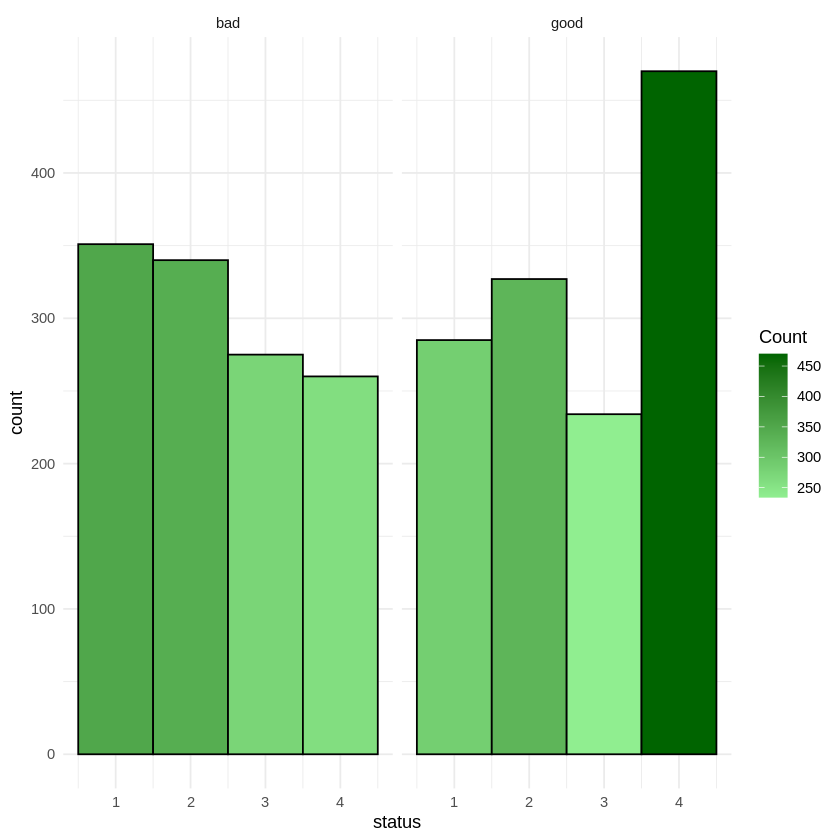

In [ ]:
status

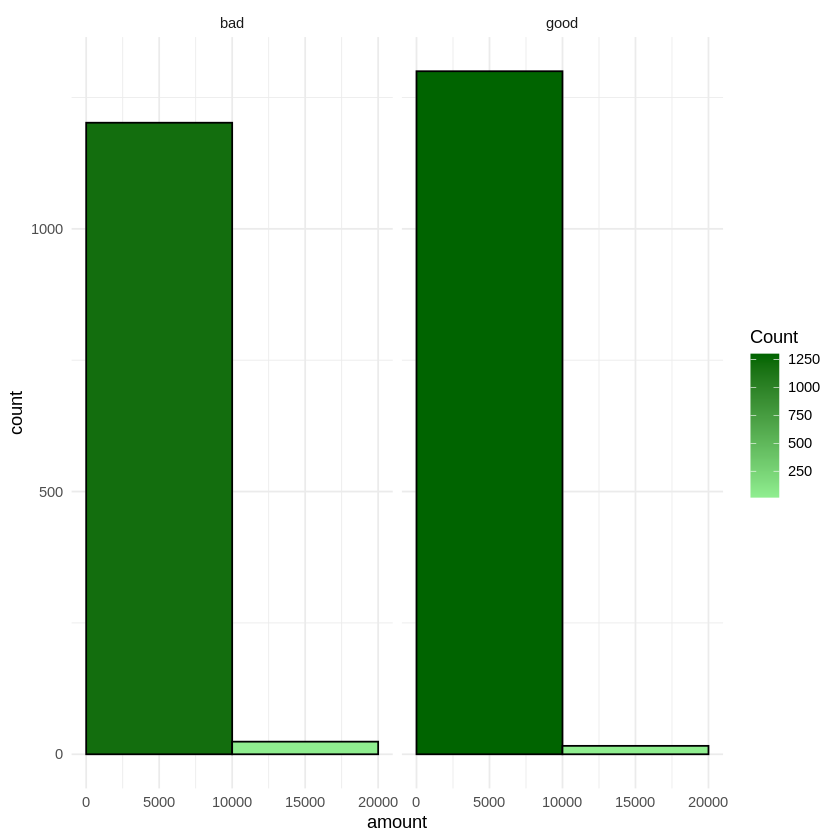

In [ ]:
#Visualize amount
amount <- ggplot(data = df2, aes(amount)) +
  geom_histogram(breaks = seq(0, 20000, by = 10000),
                 col = "black",
                 aes(fill = after_stat(count))) +
  facet_wrap(~credit_risk) +
  scale_fill_gradient("Count", low = "lightgreen", high = "darkgreen") +
  theme_minimal()

amount


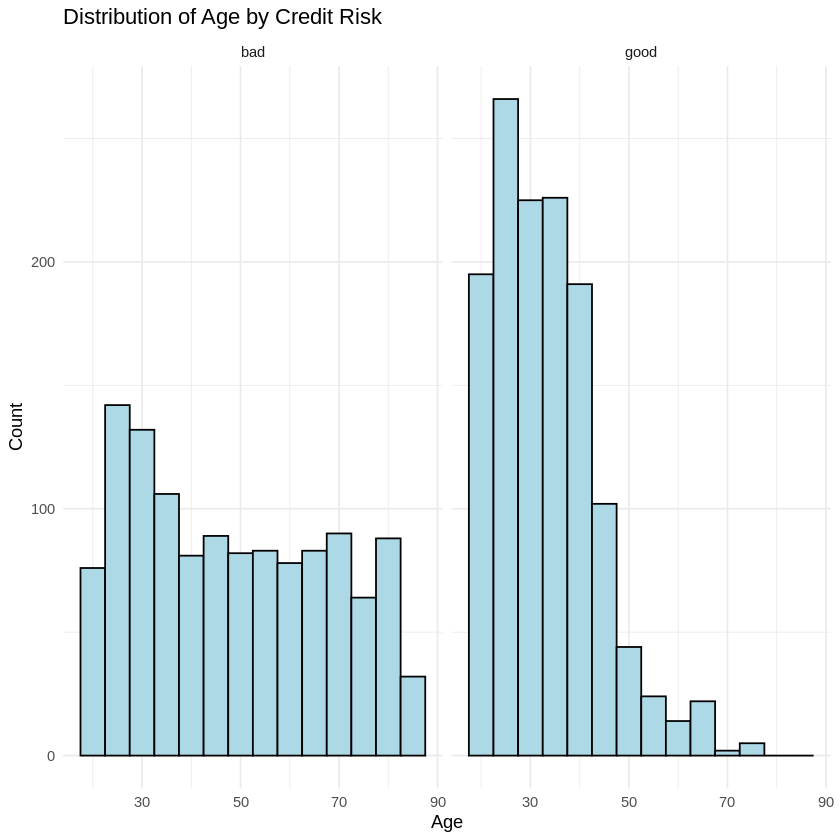

In [ ]:
#Visualize age
age <- ggplot(data = df2, aes(x = age)) +
  geom_histogram(binwidth = 5, fill = "lightblue", color = "black") +
  facet_wrap(~ credit_risk) +
  labs(title = "Distribution of Age by Credit Risk",
       x = "Age",
       y = "Count") +
  theme_minimal()

age


#Boxplot for numerical variables

In [ ]:
df_num =df|> select(age, amount, duration)
df_num = cbind(df_num, df_dup$credit_risk)
colnames(df_num) = c("age", "amount", "duration", "credit_risk")

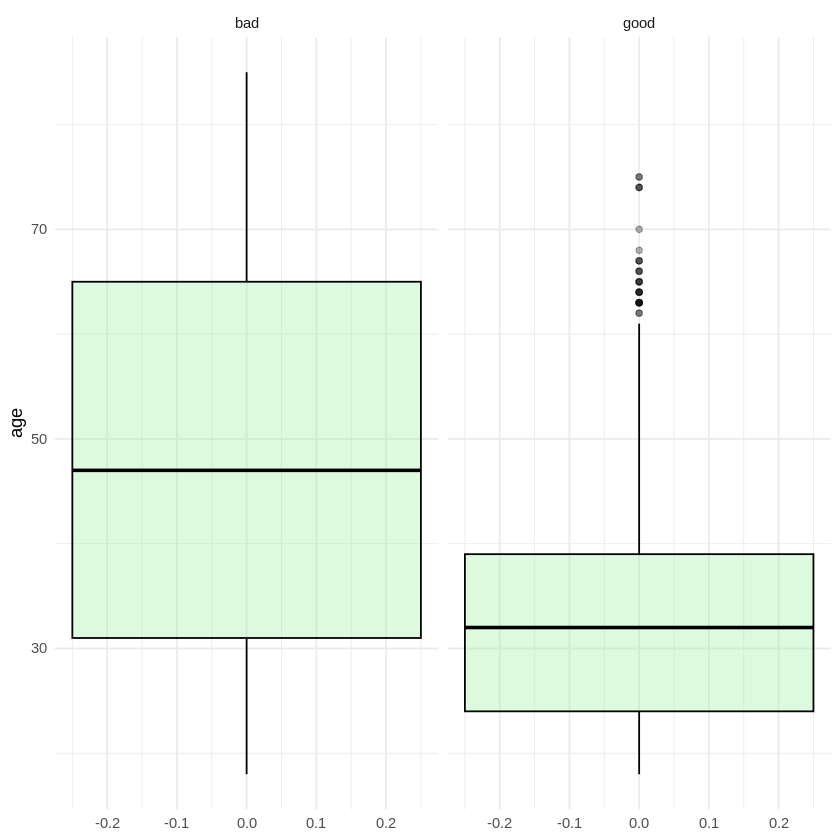

In [ ]:
#Box plot for age
bpl_age <- ggplot(df_num, aes(age)) +
          geom_boxplot(fill = 'lightgreen', colour = "black", alpha = 0.3, width = 0.5) +
          facet_wrap(~credit_risk) + coord_flip() +
          theme_minimal()

bpl_age

In [ ]:
#Boxplot for duration
bpl_duration <- ggplot(df_num, aes(duration)) +
          geom_boxplot(fill = 'lightgreen', colour = "black", alpha = 0.3, width = 0.5) +
          facet_wrap(~credit_risk) + coord_flip() +
          theme_minimal()

In [ ]:
#Boxplot for amount
bpl_amount <-  ggplot(df_num, aes(amount)) +
          geom_boxplot(fill = 'lightgreen', colour = "black", alpha = 0.3, width = 0.5) +
          facet_wrap(~credit_risk) + coord_flip() +
          theme_minimal()

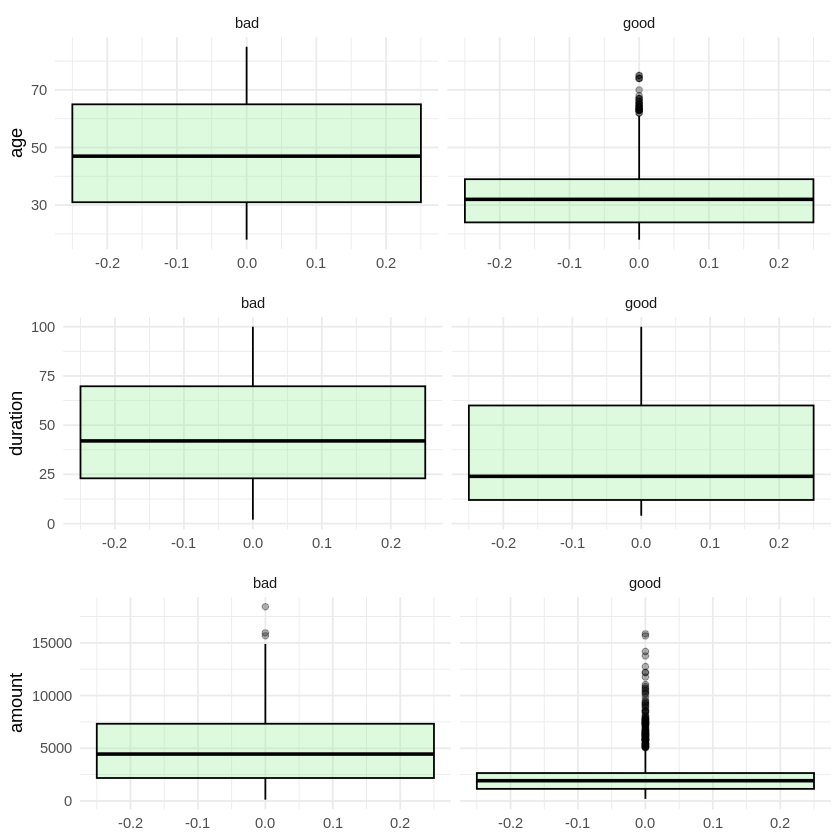

In [ ]:
grid.arrange(bpl_age, bpl_duration, bpl_amount)

#Correlations
## When using Logistic Regression we assume independent variables have low correlation

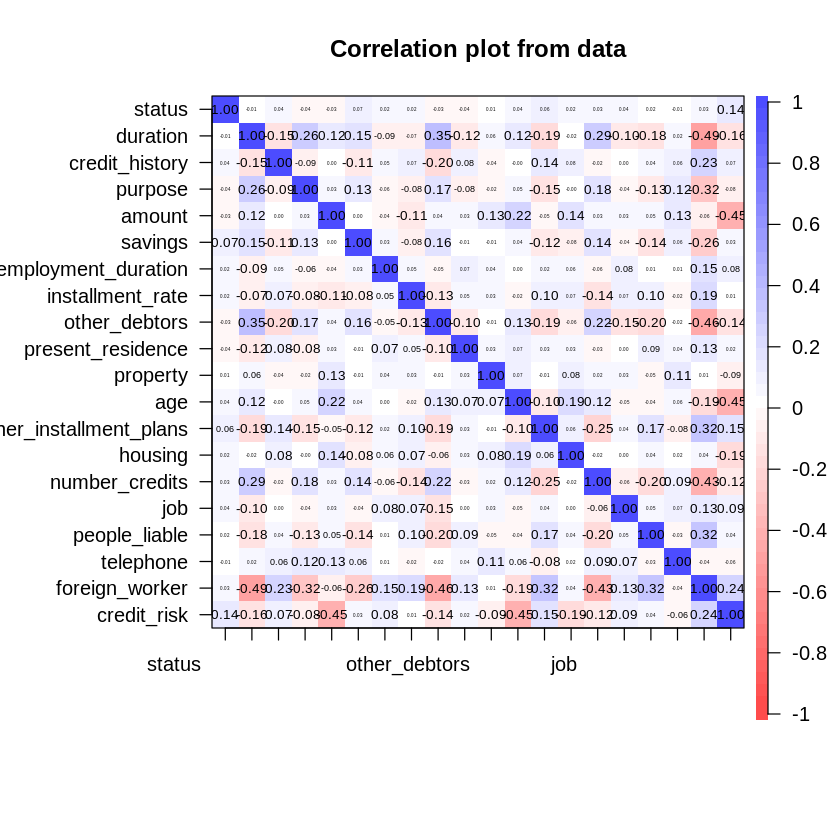

In [ ]:
#duplicate data and transform all factor variables to numeric
cor_data = df|> mutate_if(is.factor, as.numeric)
#correlation plot
corPlot(cor_data, alpha = 0.7)

#Logistic Regression

Warning message:
“Unknown or uninitialised column: `arguments`.”
Warning message:
“Unknown or uninitialised column: `arguments`.”
Warning message:
“Unknown or uninitialised column: `imputations`.”


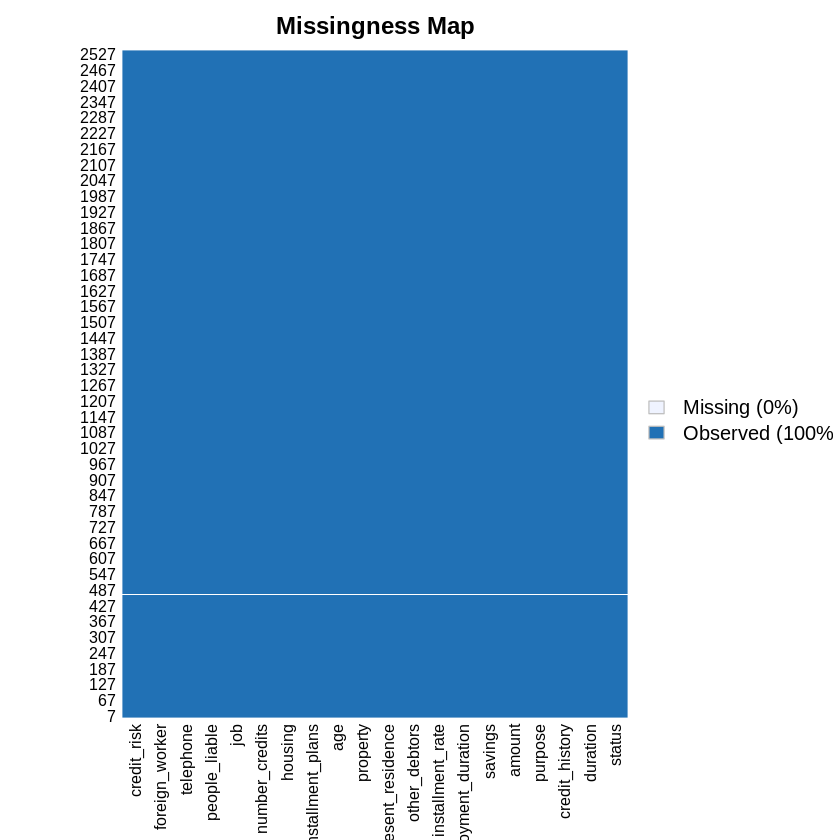

In [ ]:
#Check for missing values
missmap(df)

In [ ]:
#Model Development
#Set a seed for random number generation to ensure repeatability
set.seed(1234)

In [ ]:
#Split data into 70% training and 30 % testing
#generate a random sample of integers from 1 to 2 of the length of the dataset
ind <- sample(2, nrow(df), replace = TRUE, prob = c(0.7,0.3))
train <- df[ind == 1,]
test <- df[ind == 2,]

In [ ]:
#Logistic Regression Model
ml <- glm(credit_risk~., data = train, family = 'binomial')
summary(ml)


Call:
glm(formula = credit_risk ~ ., family = "binomial", data = train)

Coefficients:
                          Estimate Std. Error z value Pr(>|z|)    
(Intercept)              6.791e-01  5.980e-01   1.136 0.256096    
status                   3.482e-01  5.560e-02   6.262 3.79e-10 ***
duration                 1.742e-03  2.606e-03   0.668 0.503997    
credit_history           1.015e-01  5.120e-02   1.983 0.047386 *  
purpose                 -3.470e-03  2.063e-02  -0.168 0.866382    
amount                  -4.113e-04  2.902e-05 -14.171  < 2e-16 ***
savings                  1.835e-01  4.345e-02   4.225 2.39e-05 ***
employment_duration      7.437e-02  4.840e-02   1.537 0.124392    
installment_rate        -2.363e-01  5.773e-02  -4.093 4.25e-05 ***
other_debtors            1.424e-02  9.230e-02   0.154 0.877367    
present_residence        1.008e-01  5.960e-02   1.692 0.090623 .  
property                -2.977e-02  5.913e-02  -0.503 0.614614    
age                     -6.505e-02  4.641

### From the above we can see status, amount, installment rate, age, housing, job and if an individual is a foreign-work are significant factors

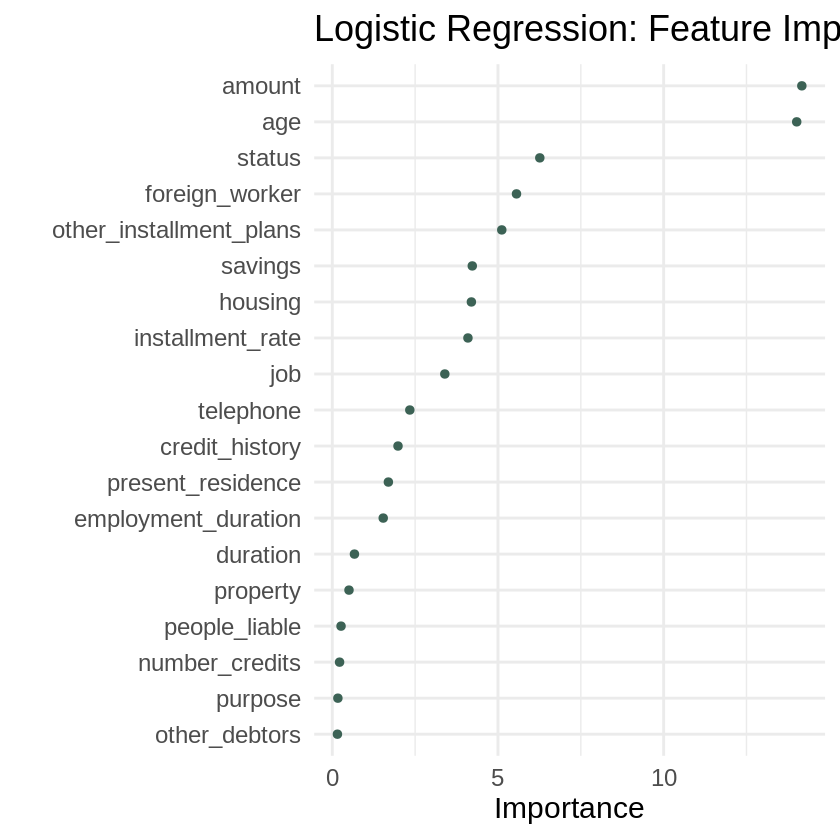

In [ ]:
#Visualzing feature importance using 'vip' package
ml %>%
       vip(num_features = 20,
            geom = "point",
            aesthetics = list(size =2, color = "#3C6255")) +
            theme_minimal(base_size = 18) +
            labs(title = "Logistic Regression: Feature Importance")

###From the above the factors that will help us make a prediction are amount,age, and status.

In [ ]:
#Predictions on the training data
#Generate probabilities using the model
p1 <- predict(ml, train, type = 'response')
pred1 <- ifelse(p1 > 0.5, 1, 0)
pred1

1    2    3    4    5    6    7    8    9   10   11   12   13   14   15   16 
   1    0    0    0    0    0    0    0    0    0    1    0    0    0    0    0 
  17   18   19   20   21   22   23   24   25   26   27   28   29   30   31   32 
   1    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0 
  33   34   35   36   37   38   39   40   41   42   43   44   45   46   47   48 
   0    0    0    0    0    0    1    0    0    0    0    0    0    0    0    0 
  49   50   51   52   53   54   55   56   57   58   59   60   61   62   63   64 
   0    0    0    0    0    0    0    0    0    0    0    0    1    1    0    0 
  65   66   67   68   69   70   71   72   73   74   75   76   77   78   79   80 
   0    1    1    0    0    0    0    0    0    0    0    0    0    0    0    0 
  81   82   83   84   85   86   87   88   89   90   91   92   93   94   95   96 
   0    0    1    0    0    0    0    0    0    1    0    1    0    1    0    0 
  97   98   99  100  101  102  103  104  105  106  107  108  109  110  111  112 
   0    0    1    0    0    0    0    0    0    0    0    0    0    0    0    0 
 113  114  115  116  117  118  119  120  121  122  123  124  125  126  127  128 
   0    0    1    0    0    0    0    0    0    0    0    0    1    0    0    0 
 129  130  131  132  133  134  135  136  137  138  139  140  141  142  143  144 
   0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0 
 145  146  147  148  149  150  151  152  153  154  155  156  157  158  159  160 
   0    1    0    0    0    0    0    0    1    1    0    0    1    0    0    0 
 161  162  163  164  165  166  167  168  169  170  171  172  173  174  175  176 
   1    0    0    0    0    0    0    0    0    0    0    0    0    0    0    1 
 177  178  179  180  181  182  183  184  185  186  187  188  189  190  191  192 
   0    0    0    1    1    0    0    0    0    0    0    0    0    0    0    0 
 193  194  195  196  197  198  199  200  201  202  203  204  205  206  207  208 
   0    0    0    0    0    0    0    0    1    1    0    0    0    0    0    0 
 209  210  211  212  213  214  215  216  217  218  219  220  221  222  223  224 
   0    1    0    0    0    0    0    0    0    0    0    0    0    0    0    0 
 225  226  227  228  229  230  231  232  233  234  235  236  237  238  239  240 
   0    0    0    0    0    0    0    0    1    1    0    0    0    0    0    0 
 241  242  243  244  245  246  247  248  249  250  251  252  253  254  255  256 
   0    0    0    0    0    0    0    0    0    1    0    0    0    1    0    0 
 257  258  259  260  261  262  263  264  265  266  267  268  269  270  271  272 
   0    0    0    0    0    1    0    0    0    0    0    0    0    0    1    0 
 273  274  275  276  277  278  279  280  281  282  283  284  285  286  287  288 
   0    0    0    1    0    0    0    0    0    0    0    0    0    0    0    0 
 289  290  291  292  293  294  295  296  297  298  299  300  301  302  303  304 
   0    1    0    0    0    0    0    0    0    0    0    1    1    0    0    0 
 305  306  307  308  309  310  311  312  313  314  315  316  317  318  319  320 
   0    0    0    0    0    0    0    1    0    1    0    0    0    0    1    0 
 321  322  323  324  325  326  327  328  329  330  331  332  333  334  335  336 
   0    0    0    0    0    1    1    0    0    0    0    1    0    0    0    0 
 337  338  339  340  341  342  343  344  345  346  347  348  349  350  351  352 
   0    1    0    1    0    1    0    0    0    0    0    0    0    0    0    0 
 353  354  355  356  357  358  359  360  361  362  363  364  365  366  367  368 
   0    0    0    0    0    0    0    0    0    1    1    0    0    0    0    0 
 369  370  371  372  373  374  375  376  377  378  379  380  381  382  383  384 
   0    0    1    0    0    0    0    0    0    0    0    0    0    0    0    0 
 385  386  387  388  389  390  391  392  393  394  395  396  397  398  399  400 
   0    0    0    0    0    0    0

In [ ]:
#Predictions on the test data
p2 <- predict(ml, test, type = 'response')
pred2 <- ifelse(p2 > 0.5, 1, 0)
pred2

1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18  19  20 
  0   1   0   0   0   1   0   0   0   0   0   0   1   0   0   0   0   0   0   0 
 21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36  37  38  39  40 
  0   0   0   0   0   0   0   1   1   1   0   1   0   0   0   0   0   0   0   0 
 41  42  43  44  45  46  47  48  49  50  51  52  53  54  55  56  57  58  59  60 
  0   0   0   0   0   0   0   0   1   1   0   0   0   0   0   0   0   0   0   0 
 61  62  63  64  65  66  67  68  69  70  71  72  73  74  75  76  77  78  79  80 
  0   1   0   0   0   0   0   1   1   1   0   0   0   0   0   0   1   0   0   0 
 81  82  83  84  85  86  87  88  89  90  91  92  93  94  95  96  97  98  99 100 
  0   0   0   0   0   1   0   1   0   0   0   0   0   1   0   0   0   0   0   0 
101 102 103 104 105 106 107 108 109 110 111 112 113 114 115 116 117 118 119 120 
  0   0   0   0   0   0   1   0   0   1   0   0   0   0   0   0   0   0   0   0 
121 122 123 124 125 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 
  0   0   0   1   0   0   0   0   0   0   0   1   0   0   0   1   0   0   0   0 
141 142 143 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 
  0   0   0   1   0   0   0   0   0   0   1   0   0   0   0   0   0   0   0   0 
161 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179 180 
  0   0   0   0   0   0   0   1   0   0   0   0   0   0   0   0   0   1   0   0 
181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197 198 199 200 
  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   1   0   0   1   0 
201 202 203 204 205 206 207 208 209 210 211 212 213 214 215 216 217 218 219 220 
  0   0   0   0   0   0   0   0   1   0   0   0   0   1   0   0   1   0   0   1 
221 222 223 224 225 226 227 228 229 230 231 232 233 234 235 236 237 238 239 240 
  0   0   0   0   1   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 
241 242 243 244 245 246 247 248 249 250 251 252 253 254 255 256 257 258 259 260 
  0   0   0   0   0   1   0   0   0   0   0   0   0   1   0   1   0   0   0   0 
261 262 263 264 265 266 267 268 269 270 271 272 273 274 275 276 277 278 279 280 
  0   0   0   1   1   0   0   0   0   1   1   1   1   0   1   1   1   1   1   1 
281 282 283 284 285 286 287 288 289 290 291 292 293 294 295 296 297 298 299 300 
  1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   0   1   1   1   1 
301 302 303 304 305 306 307 308 309 310 311 312 313 314 315 316 317 318 319 320 
  1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   0   1 
321 322 323 324 325 326 327 328 329 330 331 332 333 334 335 336 337 338 339 340 
  1   1   1   0   0   1   1   1   1   1   1   1   1   1   0   1   1   1   1   1 
341 342 343 344 345 346 347 348 349 350 351 352 353 354 355 356 357 358 359 360 
  1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   0   1   1   1   1 
361 362 363 364 365 366 367 368 369 370 371 372 373 374 375 376 377 378 379 380 
  1   1   1   1   1   0   1   1   0   1   1   1   1   1   1   1   1   1   1   1 
381 382 383 384 385 386 387 388 389 390 391 392 393 394 395 396 397 398 399 400 
  1   1   1   1   1   0   1   1   1   1   1   1   1   1   1   1   1   1   1   1 
401 402 403 404 405 406 407 408 409 410 411 412 413 414 415 416 417 418 419 420 
  1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1 
421 422 423 424 425 426 427 428 429 430 431 432 433 434 435 436 437 438 439 440 
  1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1 
441 442 443 444 445 446 447 448 449 450 451 452 453 454 455 456 457 458 459 460 
  1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1 
461 462 463 464 465 466 467 468 469 470 471 472 473 474 475 476 477 478 479 480 
  1   1   1   1   1   1   1   1   1   1   1   0   1   1   1   0   1   1   1   1 
481 482 483 484 485 486 487 488 489 490 491 492 493 494 495 496 497 498 499 500 
  1   1   1   0   1   1   1   1  

In [ ]:
#Create and calculate confusion matrix
cmlg1 <- confusionMatrix(factor(pred1), factor(train$credit_risk), positive = '1')
cmlg1

Confusion Matrix and Statistics

          Reference
Prediction   0   1
         0 646 117
         1 219 795
                                          
               Accuracy : 0.8109          
                 95% CI : (0.7919, 0.8289)
    No Information Rate : 0.5132          
    P-Value [Acc > NIR] : < 2.2e-16       
                                          
                  Kappa : 0.6204          
                                          
 Mcnemar's Test P-Value : 3.588e-08       
                                          
            Sensitivity : 0.8717          
            Specificity : 0.7468          
         Pos Pred Value : 0.7840          
         Neg Pred Value : 0.8467          
             Prevalence : 0.5132          
         Detection Rate : 0.4474          
   Detection Prevalence : 0.5706          
      Balanced Accuracy : 0.8093          
                                          
       'Positive' Class : 1               
                              

### The Model has achieved a reasonably good outcome in predicting credit risk

In [ ]:
#Confusion matrix for test data
cmlg2 <- confusionMatrix(factor(pred2), factor(test$credit_risk), positive = '1')
cmlg2

Confusion Matrix and Statistics

          Reference
Prediction   0   1
         0 268  43
         1  93 361
                                          
               Accuracy : 0.8222          
                 95% CI : (0.7932, 0.8487)
    No Information Rate : 0.5281          
    P-Value [Acc > NIR] : < 2.2e-16       
                                          
                  Kappa : 0.6407          
                                          
 Mcnemar's Test P-Value : 2.649e-05       
                                          
            Sensitivity : 0.8936          
            Specificity : 0.7424          
         Pos Pred Value : 0.7952          
         Neg Pred Value : 0.8617          
             Prevalence : 0.5281          
         Detection Rate : 0.4719          
   Detection Prevalence : 0.5935          
      Balanced Accuracy : 0.8180          
                                          
       'Positive' Class : 1               
                              